### project 1 simple linear regression

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
##read the data set
df=pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.drop("Gender",axis=1,inplace=True)

In [6]:
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [7]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

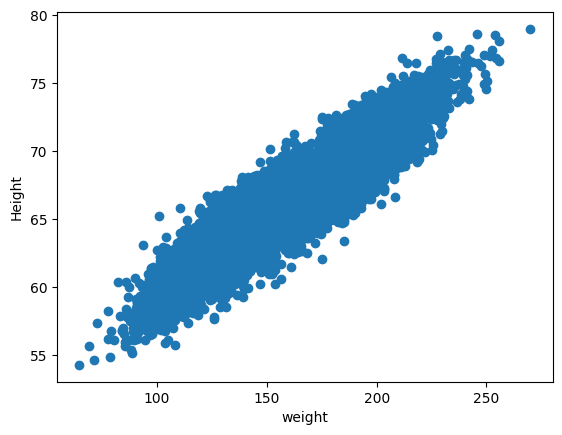

In [8]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight")
plt.ylabel("Height")

In [9]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [10]:
##there is no null value
##main aim is to create a best fit line

In [11]:
#1.dataset
#divde the features based on indpenendent features
#2.train test split
##3.train test split


In [14]:
#dividing the dataset
X=df[["Weight"]]##independent we done want a series we need a 2d array
y=df["Height"]##independent


pandas.core.series.Series

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [22]:
#20 percent is in the testdata

((2000, 1), (8000, 1), (2000,), (8000,))

In [44]:
#standradizing the data
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [45]:
X_train=scalar.fit_transform(X_train)
#X_test=scalar.fit(X_test)
X_test=scalar.fit_transform(X_test)

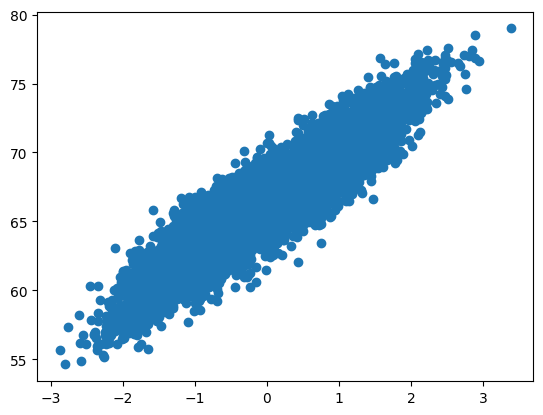

In [27]:
plt.scatter(X_train,y_train)

In [46]:
##train the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [47]:
regression.fit(X_train,y_train)

LinearRegression()

In [48]:
print("the slope of the weight:",regression.coef_.round(2))
print("the intercept of the height:",regression.intercept_.round(2))

the slope of the weight: [3.58]
the intercept of the height: 66.35


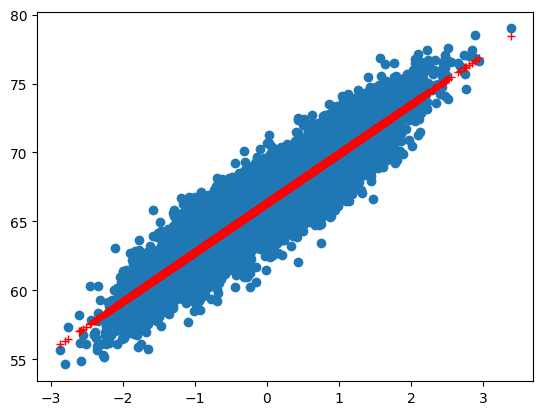

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),"r+")

In [50]:

##
Y_pred=regression.predict(X_test)

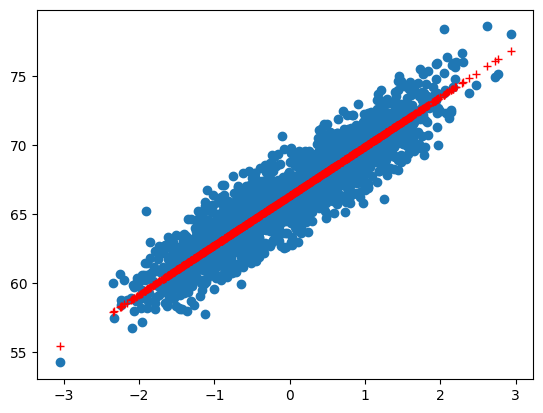

In [52]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),"r+")

In [53]:
##acuracy
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,Y_pred)
mae=mean_absolute_error(y_test,Y_pred)
rnse=np.sqrt(mse)
print(mse)
print(mae)
print(rnse)

2.176506905164884
1.1759483476573318
1.4752989206140172


In [54]:
##
from sklearn.metrics import r2_score
score=r2_score(y_test,Y_pred)

In [55]:
score

0.846739824515208

In [56]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8466631177206712

In [57]:
regression

LinearRegression()

In [58]:
scaled_weight=scalar.transform([[80]])

c:\Users\b12b3\Desktop\ML\ML-Projects\Environments\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


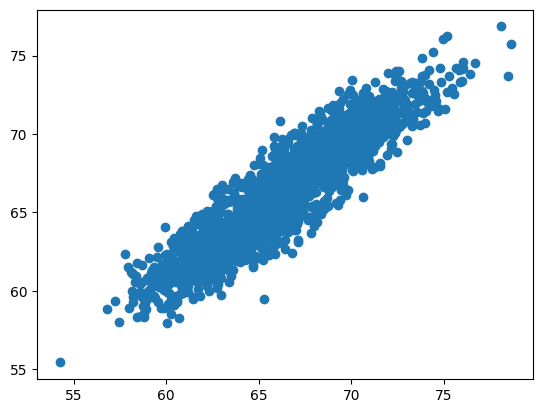

In [59]:
plt.scatter(y_test,Y_pred)

In [60]:
## Residuals
residuals=y_test-Y_pred
residuals

9415    0.055858
6377   -0.213897
8019    3.323058
7754    2.311361
4961   -0.323093
          ...   
2315   -1.719799
2166    3.319606
211     0.468577
3979   -1.351208
5482    0.338918
Name: Height, Length: 2000, dtype: float64

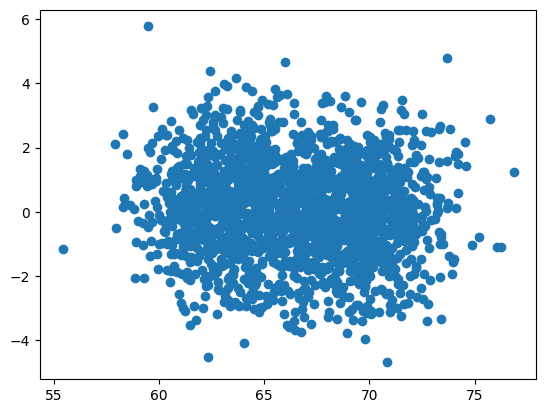

In [61]:
plt.scatter(Y_pred,residuals)

C:\Users\b12b3\AppData\Local\Temp\ipykernel_16560\2778738471.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

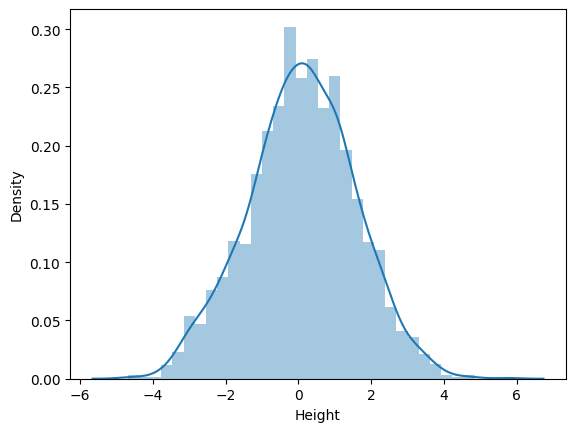

In [62]:


## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

